# Velocity product comparison : Seasonal mean velocities by z-quartile

Comparing ITS_LIVE, RETREAT velocity products with previous GOLIVE results

ITS_LIVE velocities were processed in `itslive_compare_setup.ipynb` and stored in `/cryosphere/emarshall/itslive_results`. RETREAT velocities processed in `notebooks/retreat_workflow_outline.ipynb` and stored in `/cryosphere/emarshall/retreat_results`

In [58]:
import os
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datatree import DataTree
from scipy.stats import sem

In [59]:
import sys
sys.path.insert(0, '/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/retreat/')

import retreat_tools
import itslive_tools


In [60]:
itslive_dir= '/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/328_results/itslive/'
retreat_dir = '/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/328_results/retreat/'

In [61]:
rgi_path = '/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/data/rgi/'

In [62]:
rgi15 = gpd.read_file(os.path.join(rgi_path, 'rgi15/15_rgi60_SouthAsiaEast.shp'))

In [63]:
rgi15_prj = rgi15.to_crs('EPSG:32645')

In [64]:
rgi_ids = pd.read_csv('/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/data/manuscript_rgi_ids.csv', )

lake_ids = ['RGI60-15.10255', 'RGI60-15.10285', 'RGI60-15.10279','RGI60-15.10286',
            'RGI60-15.09361','RGI60-15.09483','RGI60-15.10290','RGI60-15.10299']

In [65]:
rgi_subset = rgi15_prj.loc[rgi15_prj['RGIId'].isin(rgi_ids['RGI_IDs'].to_list())]

In [66]:
rgi_lakes = rgi_subset.loc[rgi_subset['RGIId'].isin(lake_ids)]
rgi_lands = rgi_subset.loc[~rgi_subset['RGIId'].isin(lake_ids)]

In [67]:
land_ids = rgi_lands['RGIId'].to_list()

In [68]:
lake_ids

['RGI60-15.10255',
 'RGI60-15.10285',
 'RGI60-15.10279',
 'RGI60-15.10286',
 'RGI60-15.09361',
 'RGI60-15.09483',
 'RGI60-15.10290',
 'RGI60-15.10299']

## ITSLIVE

In [122]:
itslive_dfs = os.listdir('/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/328_results/itslive/')

In [123]:
df_ls = []
for glacier in range(len(itslive_dfs)):
    
    df = pd.read_csv(os.path.join('/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/328_results/itslive/', itslive_dfs[glacier]))
    df_ls.append(df)
    
itslive_df = pd.concat(df_ls)                  

In [125]:
itslive_df.head()

,Unnamed: 0,RGIId,var,z,winter,spring,summer,fall
0,0,RGI60-15.03976,v,z0,53.015892028808594,45.375518798828125,17.690093994140625,28.27687644958496
1,0,RGI60-15.03976,v,z1,53.427650451660156,44.834651947021484,27.268951416015625,31.638057708740234
2,0,RGI60-15.03976,v,z2,63.23894500732422,44.89321517944336,31.1307430267334,31.57982635498047
3,0,RGI60-15.03976,v,z3,61.09674835205078,47.065521240234375,29.390535354614258,34.04364013671875
4,0,RGI60-15.03976,v,full,57.64139175415039,45.52740478515625,26.264698028564453,31.380157470703125


In [128]:
itslive_lands = itslive_df.loc[itslive_df['RGIId'].isin(land_ids)]
itslive_lakes = itslive_df.loc[itslive_df['RGIId'].isin(lake_ids)]

In [129]:
itslive_lands['TermType'] = 'land'
itslive_lakes['TermType'] = 'lake'

/scratch/local/u1269862/5840598/ipykernel_2719321/675845017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itslive_lands['TermType'] = 'land'
/scratch/local/u1269862/5840598/ipykernel_2719321/675845017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itslive_lakes['TermType'] = 'lake'


In [144]:
itslive_full = pd.concat([itslive_lands, itslive_lakes])

In [152]:
itslive_full_v = itslive_full.loc[itslive_full['var'] == 'v']

In [157]:
itslive_full_v['winter'] = pd.to_numeric(itslive_full_v['winter'], errors='coerce')
itslive_full_v['spring'] = pd.to_numeric(itslive_full_v['spring'], errors='coerce')
itslive_full_v['summer'] = pd.to_numeric(itslive_full_v['summer'], errors='coerce')
itslive_full_v['fall'] = pd.to_numeric(itslive_full_v['fall'], errors='coerce')

/scratch/local/u1269862/5840598/ipykernel_2719321/3248980897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itslive_full_v['winter'] = pd.to_numeric(itslive_full_v['winter'], errors='coerce')
/scratch/local/u1269862/5840598/ipykernel_2719321/3248980897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itslive_full_v['spring'] = pd.to_numeric(itslive_full_v['spring'], errors='coerce')
/scratch/local/u1269862/5840598/ipykernel_2719321/3248980897.py:3: SettingWithCopyWarning: 
A value is trying to be se

<AxesSubplot: >

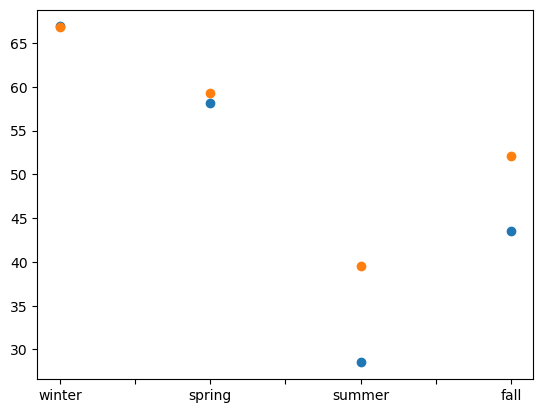

In [162]:
fig, ax = plt.subplots()
itslive_full_v.loc[itslive_full_v['TermType'] == 'land'][['winter','spring','summer','fall']].mean().plot(linestyle='None',marker='o', ax=ax)
itslive_full_v.loc[itslive_full_v['TermType'] == 'lake'][['winter','spring','summer','fall']].mean().plot(linestyle='None',marker='o', ax=ax)

In [143]:

itslive_lands.loc[(itslive_lands['var'] == 'v') & (itslive_lands['z'] == 'full')].dtypes

itslive_lands [ 

Unnamed: 0     int64
RGIId         object
var           object
z             object
winter        object
spring        object
summer        object
fall          object
TermType      object
dtype: object

## RETREAT

In [74]:
retreat_dfs = os.listdir('/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/328_results/retreat/')
retreat_dfs

['df_RGI60-15.03976.csv',
 'df_RGI60-15.04121.csv',
 'df_RGI60-15.04176.csv',
 'df_RGI60-15.04220.csv',
 'df_RGI60-15.09271.csv',
 'df_RGI60-15.09283.csv',
 'df_RGI60-15.09308.csv',
 'df_RGI60-15.09338.csv',
 'df_RGI60-15.09350.csv',
 'df_RGI60-15.09354.csv',
 'df_RGI60-15.09361.csv',
 'df_RGI60-15.09377.csv',
 'df_RGI60-15.09426.csv',
 'df_RGI60-15.09457.csv',
 'df_RGI60-15.09459.csv',
 'df_RGI60-15.09474.csv',
 'df_RGI60-15.09475.csv',
 'df_RGI60-15.09481.csv',
 'df_RGI60-15.09500.csv',
 'df_RGI60-15.10255.csv',
 'df_RGI60-15.10279.csv',
 'df_RGI60-15.10290.csv',
 'df_RGI60-15.10299.csv']

In [84]:
df_ls = []
for glacier in range(len(retreat_dfs)):
    
    df = pd.read_csv(os.path.join('/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/328_results/retreat/', retreat_dfs[glacier]))
    df_ls.append(df)
    
retreat_df = pd.concat(df_ls)                  

In [78]:
def fix_sem_units(df, season):
    df[f'{season}'] = np.where(df['var'] == 'sem_mag',
                                df[f'{season}'] * 365,
                                df[f'{season}'])
    return df

In [79]:
retreat_df = fix_sem_units(retreat_df, 'winter')

In [80]:
retreat_df = fix_sem_units(retreat_df, 'spring')

In [81]:
retreat_df = fix_sem_units(retreat_df, 'summer')

In [82]:
retreat_df = fix_sem_units(retreat_df, 'fall')

In [132]:
retreat_df

,Unnamed: 0,RGIId,var,z,winter,spring,summer,fall
0,0,RGI60-15.03976,dis_mag_my,z0,44.571988,34.096054,52.673718,48.778025
1,0,RGI60-15.03976,dis_mag_my,z1,45.649950,46.348958,54.207393,48.252066
2,0,RGI60-15.03976,dis_mag_my,z2,36.301436,24.452490,36.045566,37.807915
3,0,RGI60-15.03976,dis_mag_my,z3,32.566228,21.172872,22.293335,24.700013
4,0,RGI60-15.03976,dis_mag_my,full,40.201741,32.252994,42.477440,40.847780
...,...,...,...,...,...,...,...,...
5,0,RGI60-15.10299,sem_mag,z0,0.002639,0.003165,0.003332,0.003392
6,0,RGI60-15.10299,sem_mag,z1,0.005122,0.005123,0.014066,0.005492
7,0,RGI60-15.10299,sem_mag,z2,0.007202,0.008263,0.004631,0.007521
8,0,RGI60-15.10299,sem_mag,z3,0.007166,0.005599,0.005406,0.008778


In [94]:
retreat_lands = retreat_df.loc[retreat_df['RGIId'].isin(land_ids)]

In [95]:
retreat_lakes = retreat_df.loc[retreat_df['RGIId'].isin(lake_ids)]

In [96]:
retreat_lands['TermType'] = 'land'
retreat_lakes['TermType'] = 'lake'

/scratch/local/u1269862/5840598/ipykernel_2719321/2707299447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retreat_lands['TermType'] = 'land'
/scratch/local/u1269862/5840598/ipykernel_2719321/2707299447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retreat_lakes['TermType'] = 'lake'


In [98]:
retreat_full = pd.concat([retreat_lands, retreat_lakes])

<AxesSubplot: >

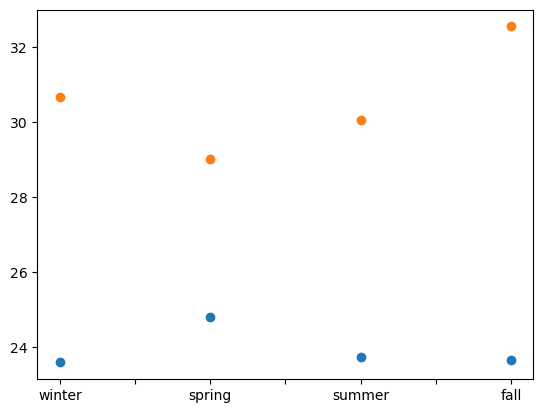

In [107]:
fig, ax = plt.subplots()
retreat_full.loc[(retreat_full['TermType'] == 'land') & (retreat_full['var'] == 'dis_mag_my')][['winter','spring','summer','fall']].mean().plot(ax=ax, linestyle='None', marker='o')
retreat_full.loc[(retreat_full['TermType'] == 'lake') & (retreat_full['var'] == 'dis_mag_my')][['winter','spring','summer','fall']].mean().plot(ax=ax, linestyle='None', marker='o')


<AxesSubplot: >

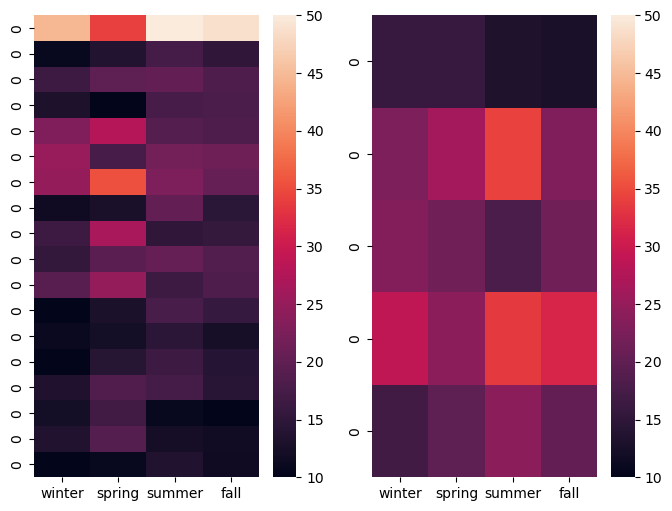

In [121]:
fig, axs = plt.subplots(ncols=2, figsize=(8,6))
sns.heatmap(data=retreat_full.loc[(retreat_full['z'] == 'z0') & (retreat_full['TermType'] == 'land') & (retreat_full['var'] == 'dis_mag_my')][['winter','spring','summer','fall']],
            ax=axs[0], vmin = 10, vmax=50)
sns.heatmap(data=retreat_full.loc[(retreat_full['z'] == 'z0') & (retreat_full['TermType'] == 'lake') & (retreat_full['var'] == 'dis_mag_my')][['winter','spring','summer','fall']],
            ax=axs[1], vmin=10, vmax=50)

In [113]:
retreat_full.loc[(retreat_full['TermType'] == 'land') & (retreat_full['var'] == 'dis_mag_my')]

,Unnamed: 0,RGIId,var,z,winter,spring,summer,fall,TermType
0,0,RGI60-15.03976,dis_mag_my,z0,44.571988,34.096054,52.673718,48.778025,land
1,0,RGI60-15.03976,dis_mag_my,z1,45.649950,46.348958,54.207393,48.252066,land
2,0,RGI60-15.03976,dis_mag_my,z2,36.301436,24.452490,36.045566,37.807915,land
3,0,RGI60-15.03976,dis_mag_my,z3,32.566228,21.172872,22.293335,24.700013,land
4,0,RGI60-15.03976,dis_mag_my,full,40.201741,32.252994,42.477440,40.847780,land
...,...,...,...,...,...,...,...,...,...
0,0,RGI60-15.09500,dis_mag_my,z0,8.854328,10.876616,13.453496,11.615468,land
1,0,RGI60-15.09500,dis_mag_my,z1,19.713110,24.372060,24.792940,24.648462,land
2,0,RGI60-15.09500,dis_mag_my,z2,26.126101,27.995120,29.239946,30.429463,land
3,0,RGI60-15.09500,dis_mag_my,z3,35.530383,33.727315,37.346356,37.357010,land
